In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from datetime import datetime

In [2]:
import pandas as pd
df = pd.read_csv('pulsar_stars.csv')

In [3]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


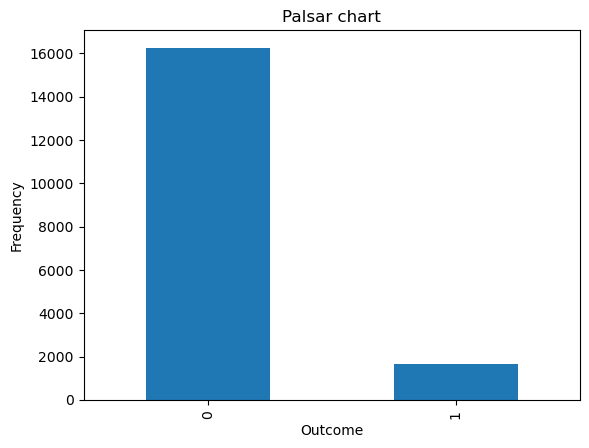

In [4]:
import matplotlib.pyplot as plt
#creating the bars using pandas
df["target_class"].value_counts().plot.bar()
#Adding the aesthetics
plt.title('Palsar chart')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()

In [5]:
#all rows all columns but last
pulsar = df.iloc[:, :-1].values
#all rows, only the last column
pulsar_class = df.iloc[:, -1].values

In [6]:
pulsar

array([[140.5625    ,  55.68378214,  -0.23457141, ...,  19.11042633,
          7.97553179,  74.24222492],
       [102.5078125 ,  58.88243001,   0.46531815, ...,  14.86014572,
         10.57648674, 127.3935796 ],
       [103.015625  ,  39.34164944,   0.32332837, ...,  21.74466875,
          7.73582202,  63.17190911],
       ...,
       [119.3359375 ,  59.93593941,   0.1593631 , ...,  58.8720002 ,
          2.49951714,   4.59517265],
       [114.5078125 ,  53.90239966,   0.20116138, ...,  13.38173065,
         10.00796731, 134.2389095 ],
       [ 57.0625    ,  85.79734025,   1.40639105, ...,  64.71256228,
         -1.59752658,   1.42947536]])

In [7]:
#Install imbalanced_learn
#!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
pulsar, pulsar_class = oversample.fit_resample(pulsar, pulsar_class)

In [11]:
len(pulsar)

32518

In [10]:
from collections import Counter
counter = Counter(pulsar_class)
print(counter)

Counter({0: 16259, 1: 16259})


TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
from sklearn.model_selection import train_test_split
#test_size is the percentage of the test size to the complete dataset
# random_state is the seed. A specific pseudorandom number to split the data set
# in order to produce same splitting every time we run the script.
pulsar_train, pulsar_test, pulsar_class_train, pulsar_class_test = train_test_split(pulsar, pulsar_class, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
#name StandardScaler()
scaler = StandardScaler()
#call it for the data (the result is array)
pulsar_train_scaled = scaler.fit_transform(pulsar_train)
pulsar_test_scaled =scaler.transform(pulsar_test)

In [ ]:
# Run algorithms using 10-fold cross validation
num_folds = 5
scoring = 'accuracy'
seedNum = 888

In [ ]:
# Set up Algorithms Spot-Checking Array
models = []
#models.append(('LR', LogisticRegression(random_state=seedNum)))
models.append(('CART', DecisionTreeClassifier(random_state=seedNum)))
#models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(random_state=seedNum)))
#models.append(('BT', BaggingClassifier(random_state=seedNum)))
models.append(('RF', RandomForestClassifier(random_state=seedNum)))
#models.append(('ET', ExtraTreesClassifier(random_state=seedNum)))
models.append(('AB', AdaBoostClassifier(random_state=seedNum)))
#models.append(('GBM', GradientBoostingClassifier(random_state=seedNum)))
results = []
names = []
metrics = []

In [ ]:
models

In [ ]:
# Generate model in turn
for name, model in models:
    startTimeModule = datetime.now()
    kfold = KFold(n_splits=num_folds, random_state=seedNum, shuffle=True)
    cv_results = cross_val_score(model, pulsar_train, pulsar_class_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print ('Model training time:',(datetime.now() - startTimeModule))
print ('Average metrics ('+scoring+') from all models:',np.mean(metrics))